# Question 7

C:\Users\Joaki\AppData\Local\Temp\ipykernel_23828\211296023.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=cases, x="agegroup", y="n", hue="sex", estimator=sum, ci=None)


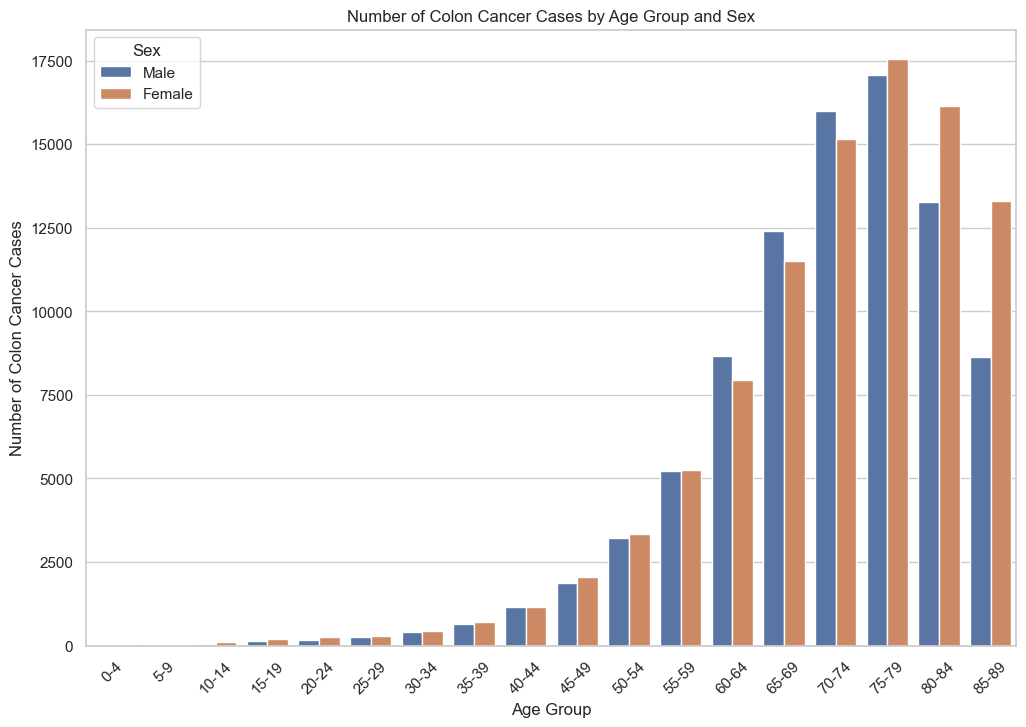

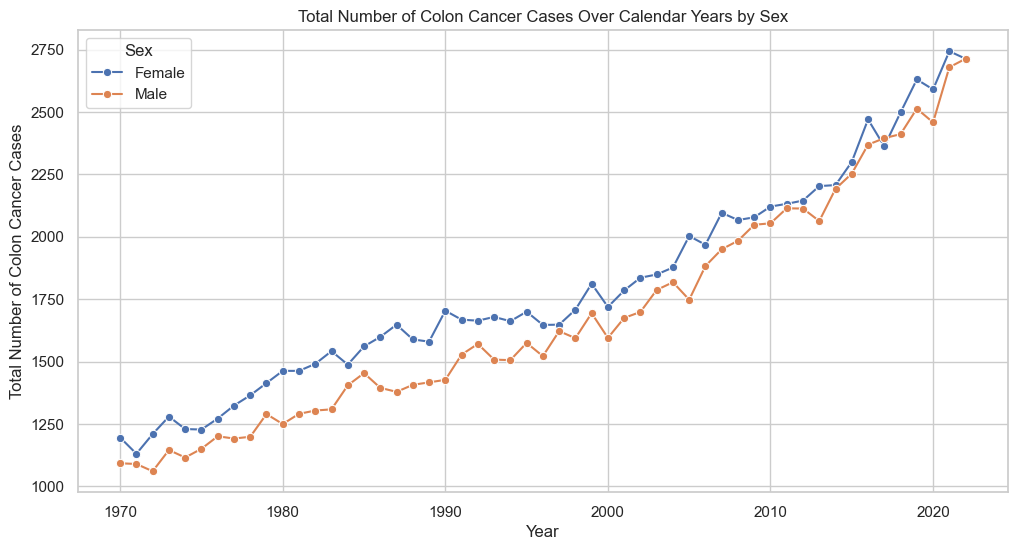

,year,sex,n_pop,n
0,1970,Female,4045318,1196
1,1970,Male,4035911,1093
2,1971,Female,4066592,1131
3,1971,Male,4048573,1090
4,1972,Female,4077814,1210
...,...,...,...,...
101,2020,Male,5222847,2458
102,2021,Female,5191619,2743
103,2021,Male,5260707,2679
104,2022,Female,5223232,2713


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load dataS
cases = pd.read_csv("cases.tsv", sep="\t")
population = pd.read_csv("population.tsv", sep="\t")

full_data = pd.merge(population, cases, on = ["agegroup", "sex", "year"])
full_data

# Set up the plot style
sns.set(style="whitegrid")

# Create a bar plot showing the number of cases by age group and sex
plt.figure(figsize=(12, 8))
sns.barplot(data=cases, x="agegroup", y="n", hue="sex", estimator=sum, ci=None)

plt.xlabel("Age Group")
plt.ylabel("Number of Colon Cancer Cases")
plt.title("Number of Colon Cancer Cases by Age Group and Sex")
plt.xticks(rotation=45)
plt.legend(title="Sex")

plt.show()

# Calculate the total number of cases per year by sex
total_cases_by_year_sex = cases.groupby(['year', 'sex'])['n'].sum().reset_index()

# Create the graph
plt.figure(figsize=(12, 6))
sns.lineplot(data=total_cases_by_year_sex, x="year", y="n", hue="sex", marker="o")
plt.xlabel("Year")
plt.ylabel("Total Number of Colon Cancer Cases")
plt.title("Total Number of Colon Cancer Cases Over Calendar Years by Sex")
plt.legend(title="Sex")
plt.grid(True)
plt.show()

cases_by_year = (
    full_data.groupby(["year", "sex"], as_index=False)
    .sum().drop("agegroup", axis=1)
)
cases_by_year
